## ML applied to eyetracking
All credits for the code go to Prof. Kouh (mkouh@drew.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Linear Regression

Minimize total error with respect to $m$ and $b$:
$E = \frac{1}{2N}\sum_{i} (y_i - (m x_i + b))^2$

Set $\frac{\partial E}{\partial m} = 0$ and $\frac{\partial E}{\partial b} = 0$
Then, the optimal $m$ and $b$ can be found by:

$\hat{m} = \frac{<xy>-<x><y>}{<x^2>-<x>^2}$

$\hat{b} = <y> - \hat{m}<x>,$

where $<x> = \sum_i x_i/N$.

(array([  2.,  13.,  34., 125., 259., 256., 199.,  94.,  13.,   5.]),
 array([-0.38580975, -0.31269135, -0.23957296, -0.16645457, -0.09333618,
        -0.02021779,  0.0529006 ,  0.12601899,  0.19913738,  0.27225577,
         0.34537416]),
 <a list of 10 Patch objects>)

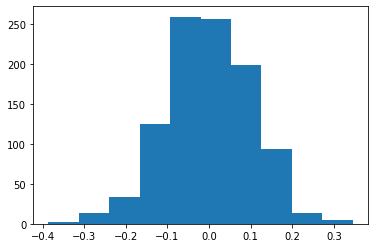

In [43]:
# JM
# np.random.randn(N) returns a sample of normal distribution with mean 0, variance 1 with N 
# data points
N = 1000
plt.hist(np.random.randn(N) * 0.1)

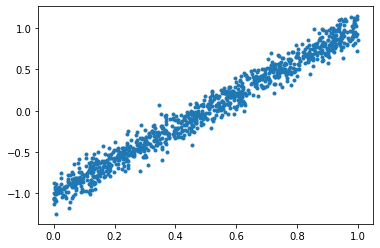

In [31]:
# Generate toy data.
m = 2
b = -1
N = 1000  # Number of samples.
X = np.random.rand(N)
Y = m*X+b + np.random.randn(N)*0.1

plt.plot(X,Y,'.')
plt.show()

m ==> True: 2.00, Estimated: 2.01
b ==> True: -1.00, Estimated: -1.00


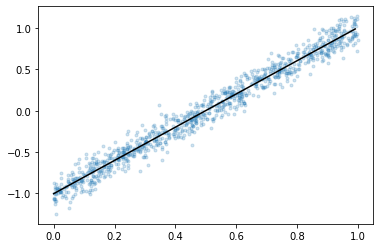

In [32]:
# Calculate parameters for the best-fit line.
x_mean = np.mean(X)
y_mean = np.mean(Y)
xy_mean = np.mean(X*Y)
x2_mean = np.mean(X*X)

mhat = (xy_mean-x_mean*y_mean)/(x2_mean-x_mean**2)
bhat = y_mean - mhat*x_mean
print("m ==> True: %3.2f, Estimated: %3.2f"%(m,mhat))
print("b ==> True: %3.2f, Estimated: %3.2f"%(b,bhat))

# Plot the best-fit line.
x = np.arange(0,1,0.01)
y = m*x + b

plt.plot(X,Y,'.',alpha=0.2)
#plt.plot(x,m*x+b,'r-')
plt.plot(x,mhat*x+bhat,'k-')
plt.show()

In [4]:
mhat = 2.2
bhat = -1
yhat = mhat*X + bhat
err = np.sum((yhat - Y)**2)/2/N
print(err)

0.010719623805903803


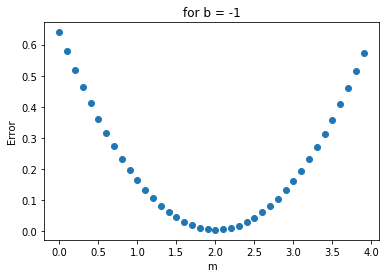

In [5]:
# Look at error landscape.

bhat = -1
mrange = list()
erange = list()
for mhat in np.arange(0,4,0.1):
    yhat = mhat*X+bhat
    err = np.sum((yhat-Y)**2)/2/N
    mrange.append(mhat)
    erange.append(err)

plt.plot(mrange,erange,'o')
plt.xlabel('m')
plt.ylabel('Error')
plt.title('for b = -1')
plt.show()

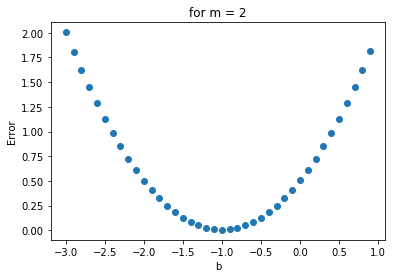

In [6]:
mhat = 2
brange = list()
erange = list()
for bhat in np.arange(-3,1,0.1):
    yhat = mhat*X+bhat
    err = np.sum((yhat-Y)**2)/2/N
    brange.append(bhat)
    erange.append(err)

plt.plot(brange,erange,'o')
plt.xlabel('b')
plt.ylabel('Error')
plt.title('for m = 2')
plt.show()

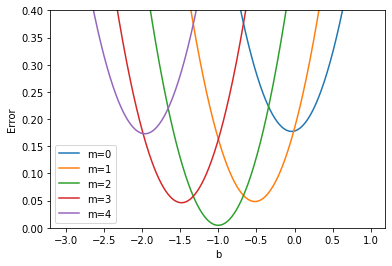

In [7]:
mrange = list()
for mhat in np.arange(0,5,1):
    mrange.append('m='+str(mhat))
    brange = list()
    erange = list()
    for bhat in np.arange(-3,1,0.01):
        yhat = mhat*X + bhat
        err = np.sum((yhat-Y)**2)/2/N
        brange.append(bhat)
        erange.append(err)
    plt.plot(brange,erange)
plt.ylim((0,0.4))
plt.legend(mrange)
plt.xlabel('b')
plt.ylabel('Error')
plt.show()

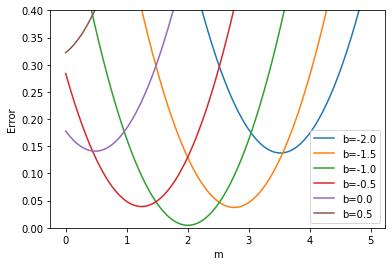

In [8]:
# 3D plot of the error as we vary m and b.

brange = list()
for bhat in np.arange(-2,1,0.5):
    brange.append('b='+str(bhat))
    mrange = list()
    erange = list()
    for mhat in np.arange(0,5,0.01):
        yhat = mhat*X + bhat
        err = np.sum((yhat-Y)**2)/2/N
        mrange.append(mhat)
        erange.append(err)
    plt.plot(mrange,erange)
plt.ylim((0,0.4))
plt.legend(brange)
plt.xlabel('m')
plt.ylabel('Error')
plt.show()

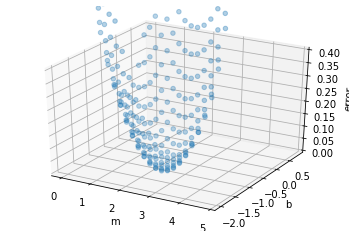

In [9]:
# 3D plot of the error as we vary m and b.
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
mrange = list()
brange = list()
erange = list()
for mhat in np.arange(0,5,0.2):
    for bhat in np.arange(-2,1,0.2):
        yhat = mhat*X + bhat
        err = np.sum((yhat-Y)**2)/2/N
        mrange.append(mhat)
        brange.append(bhat)
        erange.append(err)
ax.scatter(mrange,brange,erange)
ax.set_xlabel('m')
ax.set_ylabel('b')
ax.set_zlabel('error')
ax.set_zlim(0,0.4)
plt.show()

The overall idea is similar.  There is a functional relationship between input and output (like the linear regression example).  The "model" has computational units that are analogous to "neurons" (circles) and "synapses" (arrows). A learning algorithm attempts to find a set of optimal parameters in the model (in this case, synaptic weights).  There are many different versions of aritificial neural network, and in a classic version, the resposne of a neuron is determined by the following relationshihp:

$y_i = \sigma \left(\sum_j w_{i,j} x_{j} + b\right)$,

where $\sigma(x)$ is called a transfer or activation function that takes a form like:

$\sigma(x) = \frac{1}{1+e^{-x}}$

Fun fact (good calculus exercise):
$\frac{d\sigma}{dx} = \sigma(x) \cdot (1-\sigma(x))$

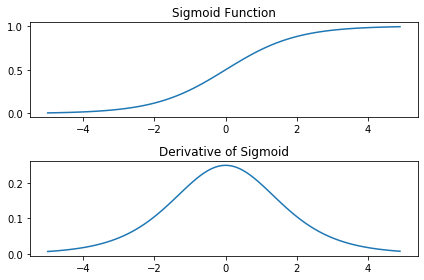

In [11]:
# Sigmoid function math
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5,5,0.1)
plt.subplot(2,1,1)
plt.plot(x,sigmoid(x))
plt.title('Sigmoid Function')
plt.subplot(2,1,2)
plt.plot(x,sigmoid(x)*(1-sigmoid(x)))
plt.title('Derivative of Sigmoid')
plt.tight_layout()
plt.show()

### Challenge and Solution
Now, we can think of the artificial neural network as a "mapper" between $X$ and $Y$ with lots of parameters, such that $Y_i = F \left(X_i; \theta \right)$, where $\theta$ denotes all parameters in the model, and $X_i$ and $Y_i$ denote $i$-th data point.  Then, just like the linear regression example, we can define error and minimize it by setting the derivative equal to zero.  That is,

$E = \frac{1}{2N} \sum_i \left(Y_{i} - F(X_i,\theta) \right)^2$ and
$\frac{dE}{d\theta} = 0$

There are a few issues.  For example, $Y_i$ is a vector (responses of the entire output layer), and so is $X_i$.  (This is not such a big deal, since we can just add up all errors.)  A more significant challenge is that unlike the simple linear regression example, the derivatives are difficult to find, there are multiple solutions (local minima) and the data size is too big.

A solution to this challege is called the gradient descent, where the parameter (to be optimized) is increased or decreased in small steps in the direction of the gradient (or slope) of the objective function (or error).

$\Delta \theta = \alpha \frac{dE}{d\theta}$.

$\alpha$ is called a learning rate.

## Quick Detour: Dataset
We will illustrate the application of artificial neural network in the context of image classification.  The dataset we will explore is hand-written digits (0, 1, ..., 9).

In [13]:
# Download data from sklearn.
from sklearn import datasets
digits = datasets.load_digits()

In [14]:
print(digits.data.shape)  
print(digits.images[0])
print(digits.data[0].shape)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(64,)
0


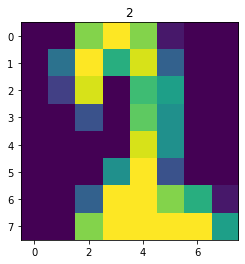

In [15]:
# Explore individual data point.
N = len(digits.data)
random_index = np.random.randint(N)
plt.imshow(digits.images[random_index])
plt.title(digits.target[random_index])
plt.show()

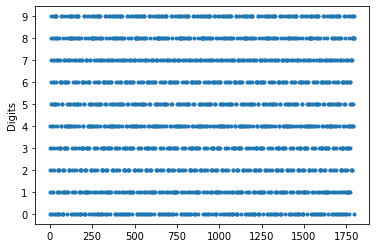

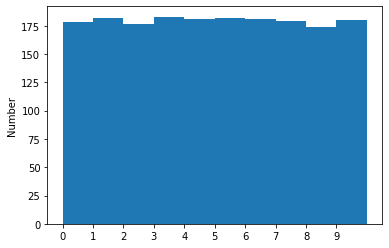

In [16]:
# Explore the full dataset.
plt.plot(digits.target,'.')
plt.ylabel('Digits')
plt.yticks(range(10))
plt.show()

plt.hist(digits.target,range(11))
plt.xticks(range(10))
plt.ylabel('Number')
plt.show()

## Quick Detour: Performance
How should we measure the performance?  Let's use confusion matrix.

### Preprocessing of dataset
One hot encoding for the output.

1797


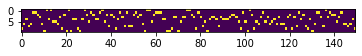

In [17]:
from sklearn.utils import shuffle

N = len(digits.target)
print(N)
# Create one-hot encoding.
X = np.array(digits.data,dtype='float')/255.0
Y = np.zeros((N,10))
for i in range(N):
    Y[i,digits.target[i]] = 1
    X[i,:] = X[i,:]-np.mean(X[i,:]) # 0-mean
    X[i,:] = X[i,:]/np.sqrt(np.sum(X[i,:]**2))
X,Y,Y_label = shuffle(X,Y,digits.target)
plt.imshow(Y[:150].transpose())
plt.show()

In [18]:
random_index = np.random.randint(N)
print(Y_label[random_index])
print(Y[random_index,:])

1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Simplistic Classification
Find average (center of mass) for each prototype, and classify based on the distance.

[178. 182. 177. 183. 181. 182. 181. 179. 174. 180.]


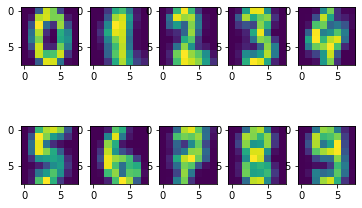

[[176   0   0   0   2   0   0   0   0   0]
 [  0 148   9   0   0   1   3   0   5  16]
 [  1   6 158   4   0   0   0   2   4   2]
 [  0   3   1 160   0   1   0   7   7   4]
 [  0   5   0   0 168   0   0   5   3   0]
 [  0   0   0   0   1 163   1   0   0  17]
 [  1   4   0   0   0   0 175   0   1   0]
 [  0   0   0   0   0   1   0 176   2   0]
 [  0  14   2   0   0   3   1   2 144   8]
 [  0   3   0   1   4   3   0   6   3 160]]
Performance = 0.91
This is the score to beat!!


In [19]:
# Comparison with the simplistic idea.
nPat, dim = np.shape(X)
avg_digits = np.zeros((10,dim))
avg_images = np.zeros((10,8,8))
counts = np.zeros(10)

for i in range(nPat):
    j = Y_label[i]
    avg_digits[j,:] = avg_digits[j,:]+X[i,:]
    avg_images[j,:,:] = avg_images[j,:,:]+np.reshape(X[i,:],(8,8))
    counts[j] = counts[j]+1
for j in range(10):
    avg_digits[j,:] = avg_digits[j,:]/counts[j]
    avg_images[j,:] = avg_images[j,:]/counts[j]

print(counts)
for j in range(10):
    plt.subplot(2,5,j+1)
    plt.imshow(avg_images[j,:,:])
plt.show()

# Calculate distance from mean.
Y_avg_pred = np.zeros(nPat)
for i in range(nPat):
    dist = np.zeros(10)
    for j in range(10):
        dist[j] = np.sum((X[i,:]-avg_digits[j,:])**2)
    Y_avg_pred[i] = np.argmin(dist)
cm = confusion_matrix(Y_label,Y_avg_pred)
print(cm)
print('Performance = %3.2f'%(np.sum(np.diagonal(cm))/np.sum(cm)))
print('This is the score to beat!!')

In [20]:
# Add a column of ones (so that bias can be learned).
X_aug = np.concatenate((X,np.ones((N,1))),axis=1)
print(X.shape)
print(X_aug.shape)
print(X_aug[0:3,-5:])

(1797, 64)
(1797, 65)
[[ 0.20788615  0.16817059 -0.10983835 -0.10983835  1.        ]
 [ 0.2809965   0.23410269 -0.04726017 -0.09415398  1.        ]
 [ 0.19095425 -0.06864368 -0.10858183 -0.10858183  1.        ]]


### Back to neural network.
Work on derivation.

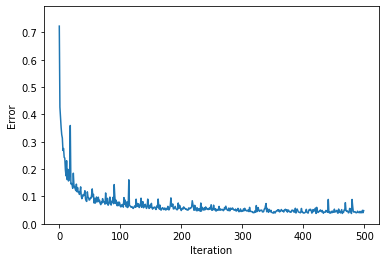

In [22]:
def calculate_error(Y,Y_pred):
    N,_ = Y.shape
    return np.sum((Y-Y_pred)**2)/N/2

a = 10 # Learning rate
#tol = 0.01 # early exit, if the error is small enough.
nIts = 10000
nPat, nIn = X.shape
nPat, nOut = Y.shape

V0 = np.random.rand(nOut,nIn+1)*2-1;
V = V0
maxErr = np.real("inf");
error = list()
for c in range(nIts):
    pIndx = np.random.randint(nPat)
    d = Y[pIndx,:].T
    #x = np.concatenate((X[pIndx,:].T,[b]),axis=0)
    x = X_aug[pIndx,:].T
    y = sigmoid(np.matmul(V,x))
    dy = y*(1-y)
    e = d-y
    g = e*dy
    dV = a*np.outer(g,x)
    V = V+dV
    if c%20==0:
        Y_pred = sigmoid(np.matmul(V,X_aug.T)).T
        error.append(calculate_error(Y,Y_pred))
        
plt.plot(error)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.ylim((0,np.max(error)*1.1))
plt.show()

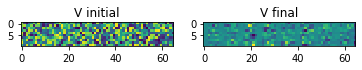

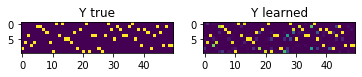

In [23]:
# Now that we've trained the network, calculate the performance.
Y_pred = sigmoid(np.matmul(V,X_aug.T)).T
Y_pred_label = np.argmax(Y_pred,axis=1)

# Weights
plt.subplot(1,2,1)
plt.imshow(V0)
plt.title('V initial')
plt.subplot(1,2,2)
plt.imshow(V)
plt.title('V final')
plt.show()

# Final layer.
how_many = 50
plt.subplot(1,2,1)
plt.imshow(Y[:how_many,:].T)
plt.title('Y true')
plt.subplot(1,2,2)
plt.imshow(Y_pred[:how_many,:].T)
plt.title('Y learned')
plt.show()

In [24]:
cm = confusion_matrix(Y_label,Y_pred_label)
print(cm)
print('Performance = %3.2f'%(np.sum(np.diagonal(cm))/np.sum(cm)))
print('Pretty good!')

[[178   0   0   0   0   0   0   0   0   0]
 [  0 175   0   1   0   2   1   0   1   2]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 178   0   0   0   0   4   1]
 [  0   0   0   0 177   0   0   1   3   0]
 [  1   0   0   0   0 180   0   0   0   1]
 [  0   4   0   0   0   3 173   0   1   0]
 [  0   0   0   1   0   0   0 177   0   1]
 [  0   6   0   6   0   2   0   0 160   0]
 [  0   2   0   3   0   5   0   0   7 163]]
Performance = 0.97
Pretty good!


## Even simpler: sklearn (and other ML libraries)

In [25]:
# MLP using sklearn.
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='logistic', max_iter=10000,
                    hidden_layer_sizes=(), random_state=1)
clf.fit(X,Y)
Y_pred = clf.predict(X)
Y_pred_label = np.argmax(Y_pred,axis=1)

cm = confusion_matrix(Y_label,Y_pred_label)
print(cm)
print('Performance = %3.2f'%(np.sum(np.diagonal(cm))/np.sum(cm)))

[[178   0   0   0   0   0   0   0   0   0]
 [ 22 159   0   0   0   0   0   0   0   1]
 [  0   2 175   0   0   0   0   0   0   0]
 [ 19   0   0 162   0   0   0   0   1   1]
 [  2   2   0   0 176   0   0   0   1   0]
 [  4   0   0   0   0 176   1   0   0   1]
 [  6   2   0   0   0   0 173   0   0   0]
 [  6   0   0   1   1   0   0 171   0   0]
 [ 42   6   0   0   0   0   0   0 126   0]
 [ 16   4   0   0   0   0   0   0   4 156]]
Performance = 0.92


In [26]:
# Can we do better?
clf = MLPClassifier(activation='logistic', max_iter=5000,
                    hidden_layer_sizes=(32,16), random_state=1)
clf.fit(X,Y)
Y_pred = clf.predict(X)
Y_pred_label = np.argmax(Y_pred,axis=1)

cm = confusion_matrix(Y_label,Y_pred_label)
print(cm)
print('Performance = %3.2f'%(np.sum(np.diagonal(cm))/np.sum(cm)))

[[178   0   0   0   0   0   0   0   0   0]
 [  1 181   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  1   0   0   0   0   0   0   0   0 179]]
Performance = 1.00


## Important Idea: perhaps for later.
Do not overfit!

In [28]:
from sklearn.model_selection import train_test_split 
# dividing X, y into train and test data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0) 
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

Y_label = np.argmax(Y_test,axis=1)
Y_pred_label = np.argmax(Y_pred,axis=1)

cm = confusion_matrix(Y_label,Y_pred_label)
print(cm)
print('Performance = %3.2f'%(np.sum(np.diagonal(cm))/np.sum(cm)))

[[35  0  0  0  0  0  0  0  0  0]
 [ 3 36  0  0  0  0  0  0  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 1  0  0 53  0  0  0  0  0  1]
 [ 1  0  0  0 41  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 41  1  0]
 [ 2  0  0  0  0  0  0  0 42  0]
 [ 1  0  0  0  0  0  0  0  1 49]]
Performance = 0.97
